## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])

In [3]:
#confirm the columsn were removed
application_df.head(0)

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [5]:
# Look at NAME value counts for binning
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [6]:
# Assign values counts to a variable to create bins. 
name_counts = application_df['NAME'].value_counts()
# gather all the NAME types that will be binned into "Other"
name_types_to_replace = list(name_counts [name_counts <5].index)
name_types_to_replace

['AMALGAMATED TRANSIT UNION',
 '4-H CLUBS & AFFILIATED 4-H ORGANIZATIONS',
 'TEXAS WATER UTILITIES ASSOCIATION',
 'PARENTS FAMILIES AND FRIENDS OF LESBIANS AND GAYS INC',
 'THE UNITED STATE PONY CLUBS INC',
 'WESTERN GOVERNORS UNIVERSITY',
 'AMERICAN ORFF-SCHULWERK ASSOCIATION',
 'GAMMA PHI BETA SORORITY INC',
 'AMATEUR ATHLETIC UNION OV THE UNITED STATES INC',
 'DEPARTMENT OF OKLAHOMA LADIES AUXILIARY TO THE VFW INC',
 'PILOT CLUB INTERNATIONAL',
 'DELTA CHI NATIONAL HOUSING CORPORATION',
 'SOROPTIMIST INTERNATIONAL TO THE AMERICAS INC',
 'WOODMEN OF THE WORLD LIFE INSURANCE SOCIETY',
 'COMMUNICATION ALLIANCE TO NETWORK THOROUGHBRED EX-RACEHORSES',
 'BLUE STAR MOTHERS OF AMERICA INC',
 'MUSIC TEACHERS NATIONAL ASSOCIATION',
 'YOUNG CATHOLIC PROFESSIONALS',
 'METHODIST RETIREMENT COMMUNITIES',
 'PTA NEW MEXICO CONGRESS',
 'UNITED MINE WORKERS OF AMERICA- INTERNATIONAL',
 'TEXAS EXTENSION EDUCATION ASSOCIATION',
 'VESTAVIA HILLS PARENT TEACHER ORGANIZATION INC',
 'INTERNATIONAL ASSOCIAT

In [7]:
# Replace in dataframe
for name in name_types_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

# Check to make sure binning was successful
application_df['NAME'].value_counts()

Other                                                                19803
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
                                                                     ...  
GUILDS OF THE SANTA FE OPERA INC                                         5
FAMILY MOTOR COACH ASSOCIATION                                           5
JAMESTOWN SOCIETY                                                        5
MOST WORSHIPFUL PRINCE HALL GRAND LODGE OF FREE & ACCEPTED MASONS        5
PTA HAWAII CONGRESS                                                      5
Name: NAME, Length: 403, dtype: int64

In [8]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
#Assign values counts to a variable to create bins. 
application_counts = application_df['APPLICATION_TYPE'].value_counts()
# gather all the application types that will be binned into "Other"
application_types_to_replace = list(application_counts[application_counts<100].index)
application_types_to_replace

['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [10]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts<400].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummy_df = pd.get_dummies(application_df, dtype=float)
application_dummy_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_ACTS MINISTRY,NAME_ACTS MISSIONS,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
X = application_dummy_df.drop("IS_SUCCESSFUL", axis=1).values
y = application_dummy_df["IS_SUCCESSFUL"].values
print(X.shape, y.shape)

(34299, 448) (34299,)


In [15]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27439, 448) (27439,) (6860, 448) (6860,)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(27439, 448) (6860, 448)


## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=448))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                11225     
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 11,546
Trainable params: 11,546
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
858/858 [==============================] - 2s 1ms/step - loss: 0.4919 - accuracy: 0.7653
Epoch 2/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.7963
Epoch 3/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.7985
Epoch 4/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8001
Epoch 5/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4181 - accuracy: 0.8002
Epoch 6/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8013
Epoch 7/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4159 - accuracy: 0.8020
Epoch 8/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8018
Epoch 9/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8021
Epoch 10/80
858/858 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.8028

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.4610 - accuracy: 0.7859 - 296ms/epoch - 1ms/step
Loss: 0.460957407951355, Accuracy: 0.7858600616455078


<AxesSubplot:>

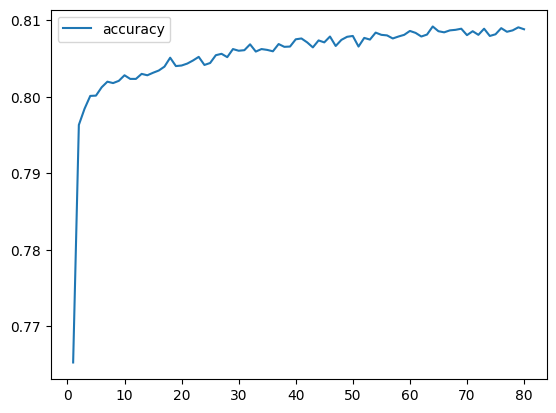

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
# Export our model to HDF5 file
nn.save_weights("AlphabetSoupCharity_Optimized.h5")

Adding and binning the NAME, adding additional hidden layers and adjusting the neurons improved the model performance and stability. I believe this is the best possible result given the current data and features provided, which given the use-case of this model, it should work well to prioritize future fundraising efforts. 